### 1 . sklearn.model_selection.KFol
### class sklearn.model_selection.KFold(n_splits=5, *, shuffle=False, random_state=None)

In [34]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV , train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression

import numpy as np
import pandas as pd

In [3]:
iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

#5개의 폴드 세트로 분리하는 KFold 객채와 폴드 세트별 정확도를 담을 리스트 객체 생성.
kfold = KFold(n_splits=5)
cv_accuracy = []
print('붓꽃 데이터 세트 크기:',features.shape[0])

붓꽃 데이터 세트 크기: 150


In [11]:
n_iter = 0

#KFold 객체의 split() 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환

for train_index, test_index in kfold.split(features):
    # kfold.split()으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    # 반복 시 마다 정확도 측정
    accuracy = np.round(accuracy_score(y_test,pred),4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print(f'\n#{n_iter} 교차검증 정확도 : {accuracy}, 학습 데이터 크기 : {train_size}, 검증 데이터 크기 : {test_size}')
    print(f'#{n_iter} 검증 세트 인덱스 : {test_index}')
    cv_accuracy.append(accuracy)

# 개별 iteration별 정확도를 합하여 평균 정확도 계싼
print(f'\n## 평균 검증 정확도 : {np.mean(cv_accuracy)}')


#1 교차검증 정확도 : 1.0, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#1 검증 세트 인덱스 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차검증 정확도 : 0.9667, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#2 검증 세트 인덱스 : [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차검증 정확도 : 0.8667, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#3 검증 세트 인덱스 : [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차검증 정확도 : 0.9333, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#4 검증 세트 인덱스 : [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차검증 정확도 : 0.7333, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#5 검증 세트 인덱스 : [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도 : 0.9


In [16]:
cl_arr = ['DecisionTreeClassifier', 'LogisticRegression' ]
for i in cl_arr:
    print(f'{i}()')
    for train_index, test_index in kfold.split(features):
        # kfold.split()으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
        X_train, X_test = features[train_index], features[test_index]
        y_train, y_test = label[train_index], label[test_index]
        clf = eval(i)
        # 학습 및 예측
        clf.fit(X_train, y_train)
        pred = dt_clf.predict(X_test)
        n_iter += 1
        # 반복 시 마다 정확도 측정
        accuracy = np.round(accuracy_score(y_test,pred),4)
        train_size = X_train.shape[0]
        test_size = X_test.shape[0]
        print(f'\n#{n_iter} 교차검증 정확도 : {accuracy}, 학습 데이터 크기 : {train_size}, 검증 데이터 크기 : {test_size}')
        print(f'#{n_iter} 검증 세트 인덱스 : {test_index}')
        cv_accuracy.append(accuracy)

# 개별 iteration별 정확도를 합하여 평균 정확도 계산
print(f'\n## 평균 검증 정확도 : {np.mean(cv_accuracy)}')

DecisionTreeClassifier()


TypeError: DecisionTreeClassifier.fit() missing 1 required positional argument: 'y'

### 2. sklearn.model_selection.StratifiedKFold
### class sklearn.model_selection.StratifiedKFold(n_splits=5, *, shuffle=False, random_state=None)

In [19]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df["label"] = iris.target
iris_df["label"].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [27]:
kfold = KFold(n_splits=3)
# kfold.split(x)는 폴드 세트를 3번 반복할 때마다 달라지는 학습/테스트 용 데이터 로우 인덱스 번호 반환.
n_iter = 0
for train_index, test_index  in kfold.split(iris_df):
    n_iter +=1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print(f'## 교차 검증 {n_iter}')
    print(f'학습 레이블 데이터 분포:\n{label_train.value_counts()}')
    print(f'검증 레이블 데이터 분포:\n{label_test.value_counts()}')

## 교차 검증 1
학습 레이블 데이터 분포:
1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
0    50
Name: label, dtype: int64
## 교차 검증 2
학습 레이블 데이터 분포:
0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
1    50
Name: label, dtype: int64
## 교차 검증 3
학습 레이블 데이터 분포:
0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
2    50
Name: label, dtype: int64


In [28]:
skf = StratifiedKFold(n_splits=3)
n_iter = 0
for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iter+=1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print(f'## 교차 검증 {n_iter}')
    print(f'학습 레이블 데이터 분포:\n{label_train.value_counts()}')
    print(f'검증 레이블 데이터 분포:\n{label_test.value_counts()}')

## 교차 검증 1
학습 레이블 데이터 분포:
2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
0    17
1    17
2    16
Name: label, dtype: int64
## 교차 검증 2
학습 레이블 데이터 분포:
1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
0    17
2    17
1    16
Name: label, dtype: int64
## 교차 검증 3
학습 레이블 데이터 분포:
0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
1    17
2    17
0    16
Name: label, dtype: int64


#### 3. sklearn.model_selection.cross_val_score
#### sklearn.model_selection.cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)

In [44]:
iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도(accuracy), 교차 검증 세트는 3개
scores = cross_val_score(dt_clf, data, label, scoring='accuracy', cv = 3)
print(f'교차 검증별 정확도 : {np.round(scores, 4)}')
print(f'평균 검증 정홛도 : {np.round(np.mean(scores), 4)}')

교차 검증별 정확도 : [0.98 0.94 0.98]
평균 검증 정홛도 : 0.9667


#### 4. sklearn.model_selection.GridSearchCV
#### class sklearn.model_selection.GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)

In [39]:
# 데이터를 로딩하고 학습데이터와 테스트 데이터 분리
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.2, random_state = 121)

dtree = DecisionTreeClassifier()

### parameter 들을 dictionary 형태로 설정
parameters = {'max_depth' : [1,2,3], 'min_samples_split' : [2,3]}

# param_gird의 하이퍼 파라미터들의 3개의 train, test_set_fold로 나누어서 테스트 수행 설정
### refit = True 가 default 임. True이면 가장 좋은 파라미터 설정으로 재학습 시킴
grid_dtree = GridSearchCV(dtree, param_grid = parameters, cv = 3, refit = True)

# 붓꽃 Train 데이터로 param_grid의 하이퍼 파라미터들을 순차적으로 학습/평가
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과를 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [40]:
print(f'GridSearchCV 최적 파라미터 : {grid_dtree.best_params_}')
print(f'GridSearchCV 최고 정확도 : {grid_dtree.best_score_}')

GridSearchCV 최적 파라미터 : {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.975


In [42]:
# GridSerachCV의 refit으로 이미 학습이 된 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 하이퍼 파라미터로 학습이 됨
pred = estimator.predict(X_test)
print(f'테스트 데이터 세트 정확도 : {accuracy_score(y_test,pred):.4f}')

테스트 데이터 세트 정확도 : 0.9667


In [66]:
dia_df = pd.read_csv('./diabetes.csv')
dia_df_1 = pd.DataFrame(dia_df)
dia_data = dia_df_1.iloc[:,0:-1]
dia_label = dia_df_1.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(dia_data, dia_label, test_size = 0.2, random_state = 121)

dtree = DecisionTreeClassifier()
parameters = {'max_depth' : [5,6,7], 'min_samples_split' : [2,3]}

grid_dtree = GridSearchCV(dtree, param_grid = parameters, cv = 3, refit = True)

grid_dtree.fit(X_train, y_train)

scores_df = pd.DataFrame(grid_dtree.cv_results_)
print(scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']])

print(f'\nGridSearchCV 최적 파라미터 : {grid_dtree.best_params_}')
print(f'GridSearchCV 최고 정확도 : {grid_dtree.best_score_}')

estimator = grid_dtree.best_estimator_

pred = estimator.predict(X_test)
print(f'테스트 데이터 세트 정확도 : {accuracy_score(y_test,pred):.4f}')

                                     params  mean_test_score  rank_test_score  \
0  {'max_depth': 5, 'min_samples_split': 2}         0.723083                1   
1  {'max_depth': 5, 'min_samples_split': 3}         0.719823                2   
2  {'max_depth': 6, 'min_samples_split': 2}         0.705173                4   
3  {'max_depth': 6, 'min_samples_split': 3}         0.701897                6   
4  {'max_depth': 7, 'min_samples_split': 2}         0.708425                3   
5  {'max_depth': 7, 'min_samples_split': 3}         0.703523                5   

   split0_test_score  split1_test_score  split2_test_score  
0           0.746341           0.726829           0.696078  
1           0.741463           0.726829           0.691176  
2           0.731707           0.702439           0.681373  
3           0.731707           0.707317           0.666667  
4           0.731707           0.712195           0.681373  
5           0.741463           0.702439           0.666667  

Grid

In [70]:
dia_df = pd.read_csv('./diabetes.csv')
dia_df_1 = pd.DataFrame(dia_df)

x = dia_df_1[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
        'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = dia_df_1[['Outcome']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 121)

dtree = DecisionTreeClassifier()
parameters = {'max_depth' : [5,6,7], 'min_samples_split' : [2,3]}

grid_dtree = GridSearchCV(dtree, param_grid = parameters, cv = 3, refit = True)

grid_dtree.fit(X_train, y_train)

scores_df = pd.DataFrame(grid_dtree.cv_results_)
print(scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']])

print(f'\nGridSearchCV 최적 파라미터 : {grid_dtree.best_params_}')
print(f'GridSearchCV 최고 정확도 : {grid_dtree.best_score_}')

estimator = grid_dtree.best_estimator_

pred = estimator.predict(X_test)
print(f'테스트 데이터 세트 정확도 : {accuracy_score(y_test,pred):.4f}')

                                     params  mean_test_score  rank_test_score  \
0  {'max_depth': 5, 'min_samples_split': 2}         0.721457                1   
1  {'max_depth': 5, 'min_samples_split': 3}         0.721457                1   
2  {'max_depth': 6, 'min_samples_split': 2}         0.695385                6   
3  {'max_depth': 6, 'min_samples_split': 3}         0.705173                4   
4  {'max_depth': 7, 'min_samples_split': 2}         0.697019                5   
5  {'max_depth': 7, 'min_samples_split': 3}         0.713319                3   

   split0_test_score  split1_test_score  split2_test_score  
0           0.741463           0.726829           0.696078  
1           0.741463           0.726829           0.696078  
2           0.726829           0.697561           0.661765  
3           0.731707           0.702439           0.681373  
4           0.726829           0.697561           0.666667  
5           0.731707           0.717073           0.691176  

Grid

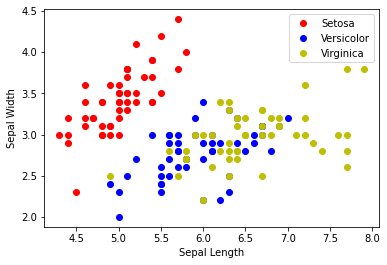

In [89]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
sepal = iris.data[:, 0:2]
kind = iris.target

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.plot(sepal[kind == 0][:,0], sepal[kind == 0][:,1], "ro", label = 'Setosa')
plt.plot(sepal[kind == 1][:,0], sepal[kind == 1][:,1], "bo", label = 'Versicolor')
plt.plot(sepal[kind == 2][:,0], sepal[kind == 2][:,1], "yo", label = 'Virginica')

plt.legend()